## Create Yelp subset with users that wrote 50-100 reviews to reduce dataset size from 3.6B records

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
filename = 'yelp_review.csv'
filepath = os.path.join('..','yelp_dataset',filename)
reviews_data_df = pd.read_csv(filepath)
filename = 'restaurants.csv'
filepath = os.path.join(filename)
restaurant_data_df = pd.read_csv(filepath)
restaurant_data_df.rename(columns={'stars':'overall_stars'},inplace=True)
business_and_review = restaurant_data_df.merge(reviews_data_df,on='business_id')

review_df_with_count = business_and_review[
    ['name','review_id','user_id','business_id','stars','text','date']\
    ].merge(business_and_review[['user_id','stars']]\
            .rename(columns={'stars':'review_count'})\
            .groupby('user_id')\
            .count(),left_on = 'user_id',right_index=True)

In [4]:
# review_df_with_count[
#         (review_df_with_count['review_count']>lower) & \
#         (review_df_with_count['review_count']<=upper)]

rating distribution of reviews from users with 0 to 1 reviews written
518291 reviews in subset


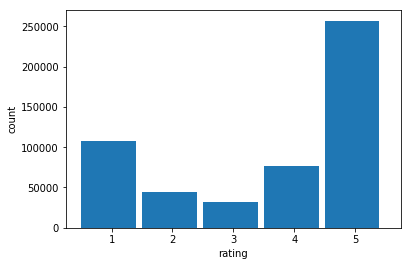

rating distribution of reviews from users with 1 to 30 reviews written
2129629 reviews in subset


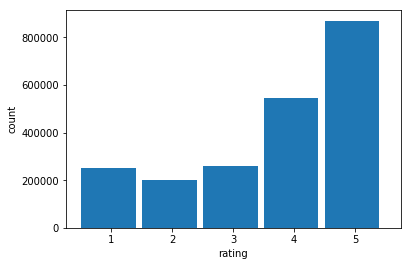

rating distribution of reviews from users with 30 to 50 reviews written
274066 reviews in subset


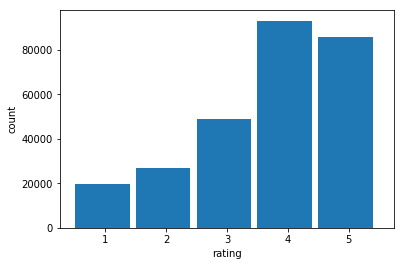

rating distribution of reviews from users with 50 to 100 reviews written
323310 reviews in subset


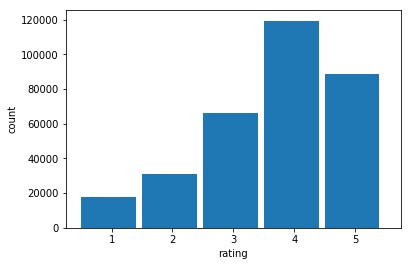

rating distribution of reviews from users with 100 to 1000 reviews written
382571 reviews in subset


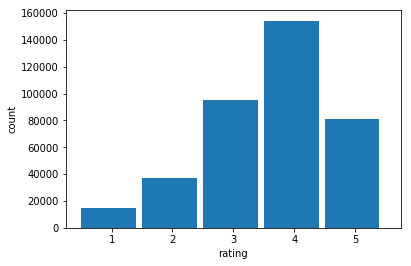

In [5]:
# import matplotlib.pyplot as plt
thresholds = [0,1,30,50,100,1000]
for n in range(len(thresholds)-1):
    upper = thresholds[n+1]
    lower = thresholds[n]
    print(f'rating distribution of reviews from users with {lower} to {upper} reviews written')
#     upper_filter = review_df_with_count['review_count']>lower
#     lower_filter = review_df_with_count['review_count']<=upper
    reviews = list(review_df_with_count[
        (review_df_with_count['review_count']>lower) & \
        (review_df_with_count['review_count']<=upper)]['stars'])
    print(f'{len(reviews)} reviews in subset')
    plt.hist(reviews,bins=[x+0.5 for x in range(6)],align='mid',width=0.9)
    plt.xlabel('rating')
    plt.ylabel('count')
    plt.show()

In [7]:
upper = 100
lower = 50
reviews_50_100 = review_df_with_count[
        (review_df_with_count['review_count']>lower) & \
        (review_df_with_count['review_count']<=upper)]
reviews_50_100
reviews_50_100.to_csv('reviews_users_50-100.csv',index = False)

In [8]:
reviews_50_100.describe()

,stars,review_count
count,323310.000000,323310.000000
mean,3.712227,71.869240
std,1.131043,14.220856
min,1.000000,51.000000
25%,3.000000,59.000000
50%,4.000000,70.000000
75%,5.000000,83.000000
max,5.000000,100.000000
